### Simulate RDD Data 

# Make some choices

Running this cell will define the variables of interest, our hyperparameters and some training options.

Make sure your Google Colab runtime has a GPU. You can turn this on via:

`Runtime -> Change Runtime type -> Hardware Accelerator -> GPU`

In [138]:
import wgan
import torch
import pandas as pd
from rdd import rdd 
import numpy as np
import importlib
importlib.reload(wgan)
#assert torch.cuda.is_available()

# Y | X, t
cont1 = ["x"] 
cont2 = ["y"] 
text2 = ["x"] 
lbound1 = {"x": -1}
ubound1 = {"x": 1} 
lbound2 = {"y": 0}
ubound2 = {"y": 1}

### Lee data

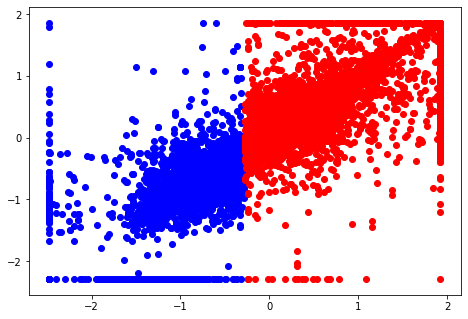

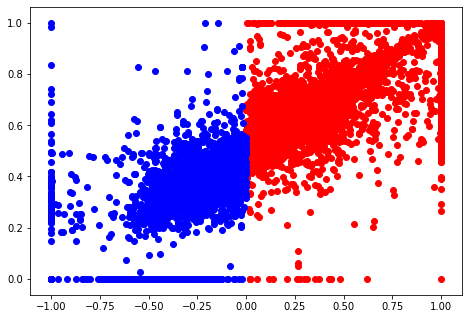

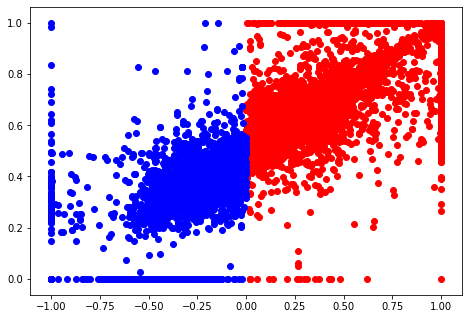

In [128]:
fig=plt.figure() 
ax=fig.add_axes([0,0,1,1])
ax.scatter(context2b.numpy(),x2b.numpy(), color='b')
ax.scatter(context2a.numpy(),x2a.numpy(), color='r')


fig=plt.figure() 
ax=fig.add_axes([0,0,1,1])
ax.scatter(dfa['x'],dfa['y'], color='r')
ax.scatter(dfb['x'],dfb['y'], color='b')

u_da = data_wrapper2.deprocess(x2a,context2a)
u_db = data_wrapper2.deprocess(x2b,context2b)

fig=plt.figure() 
ax=fig.add_axes([0,0,1,1])
ax.scatter(u_da['x'],u_da['y'], color='r')
ax.scatter(u_db['x'],u_db['y'], color='b')


In [113]:
df['y'].mean()
df['y'].std()

0.24105499073909128

In [143]:
data_wrapper2.cont_bounds

tensor([[0.],
        [1.]])

In [274]:
data_wrapper2.means


[tensor([[0.5511]]), tensor([[0.1275]])]

In [373]:
file = "data/cleaned/lee.csv"
df = pd.read_csv(file)

In [391]:
file = "data/cleaned/lee.csv"
df = pd.read_csv(file)

dfa = df[df['x']>0].copy()
print(dfa.head())

dfb = df[df['x']<=0].copy()
d= [64,64,64]
dc=[128,128,128]

data_wrapper1 = wgan.DataWrapper(df,cont1,continuous_lower_bounds=lbound1,
                                              continuous_upper_bounds=ubound1)
x1,context1 = data_wrapper1.preprocess(df)
specs1 = wgan.Specifications(data_wrapper1,batch_size=256,max_epochs=1000,
                              critic_d_hidden=dc,generator_d_hidden=d,critic_gp_factor=1, 
                                     print_every=100,generator_dropout=0.3)
generator1 = wgan.Generator(specs1)
critic1 = wgan.Critic(specs1)


data_wrapper2 = wgan.DataWrapper(df,cont2,context_vars=text2,continuous_lower_bounds=lbound2,
                                              continuous_upper_bounds=ubound2,scale=False)
x2a,context2a = data_wrapper2.preprocess(dfa)
specs2a = wgan.Specifications(data_wrapper2,batch_size=512,max_epochs=1000,generator_d_noise=1,
                              critic_d_hidden=[256,128,64],generator_d_hidden=d,critic_gp_factor=2, 
                                     print_every=100,generator_dropout=0.4)
#generator2a = wgan.Generator(specs2a)
#critic2a = wgan.Critic(specs2a)


#data_wrapper2b = wgan.DataWrapper(dfb,cont2,continuous_lower_bounds=lbound2,
                                 # continuous_upper_bounds=ubound2)
x2b,context2b = data_wrapper2.preprocess(dfb)
specifications2b = wgan.Specifications(data_wrapper2,batch_size=256,max_epochs=1000,generator_d_noise=1,
                                       critic_d_hidden=dc,generator_d_hidden=d,critic_gp_factor=0.5,
                                     print_every=100,generator_dropout=0.3)
#generator2b = wgan.Generator(specifications2b)
#critic2b = wgan.Critic(specifications2b)

          x         y
0  0.104869  0.580962
1  0.139252  0.461058
3  0.086822  0.584580
4  0.399358  0.580286
5  0.168077  0.624352
settings: {'critic_d_hidden': [128, 128, 128], 'critic_dropout': 0, 'critic_steps': 15, 'critic_lr': 0.0001, 'critic_gp_factor': 1, 'generator_d_hidden': [64, 64, 64], 'generator_dropout': 0.3, 'generator_lr': 0.0001, 'generator_d_noise': 1, 'gaussian_similarity_penalty': None, 'optimizer': 'AdamHD', 'max_epochs': 1000, 'batch_size': 256, 'test_set_size': 16, 'load_checkpoint': None, 'save_checkpoint': None, 'save_every': 100, 'print_every': 100, 'device': 'cpu'}
settings: {'critic_d_hidden': [256, 128, 64], 'critic_dropout': 0, 'critic_steps': 15, 'critic_lr': 0.0001, 'critic_gp_factor': 2, 'generator_d_hidden': [64, 64, 64], 'generator_dropout': 0.4, 'generator_lr': 0.0001, 'generator_d_noise': 1, 'gaussian_similarity_penalty': None, 'optimizer': 'AdamHD', 'max_epochs': 1000, 'batch_size': 512, 'test_set_size': 16, 'load_checkpoint': None, 'save_checkpoi

Run the next cell to train the models. You can abort at any time to continue with the evaluation.

In [392]:
# Option 1: train from scratch
wgan.train(generator1, critic1, x1, context1, specs1)
#wgan.train(generator2a, critic2a, x2a, context2a, specs2a)
#wgan.train(generator2b, critic2b, x2b, context2b, specifications2b)

epoch 0 | step 27 | WD_test 0.09 | WD_train 0.06 | sec passed 0 |
epoch 100 | step 2627 | WD_test 1.3 | WD_train 0.97 | sec passed 26 |
epoch 200 | step 5227 | WD_test 0.2 | WD_train 0.34 | sec passed 28 |
epoch 300 | step 7827 | WD_test 0.17 | WD_train 0.05 | sec passed 27 |
epoch 400 | step 10427 | WD_test 0.2 | WD_train 0.02 | sec passed 27 |
epoch 500 | step 13027 | WD_test -0.02 | WD_train 0.03 | sec passed 27 |
epoch 600 | step 15627 | WD_test -0.37 | WD_train 0.01 | sec passed 28 |
epoch 700 | step 18227 | WD_test 0.05 | WD_train 0.02 | sec passed 27 |
epoch 800 | step 20827 | WD_test -0.05 | WD_train 0.01 | sec passed 28 |
epoch 900 | step 23427 | WD_test -0.26 | WD_train 0.02 | sec passed 28 |


Alternatively, you can load our pre-trained parameters:

In [ ]:
# Option 2: load trained model parameters
def load_saved_parameters(type):
  for model, name in zip(G + C, ["G_0", "G_1", "C_0", "C_1"]):
      state_dict = torch.load("trained_models/" + name + "_{}.pth".format(type))
      model.load_state_dict(state_dict)

#load_saved_parameters("exp")

To get a simulated data frame, we use the `DataWrapper.apply_generator(generator, df)` method, which updates columns in `df` with data simulated from `generator` wherever possible. We can therefore chain multiple calls together to build up a fake dataframe from multiple (partial) generators.
Similarly, we can add a column with the values of the critic using the `DataWrapper.apply_critic(critic, df)` method.

We'll wrap everything into a function so that we can repeat later.

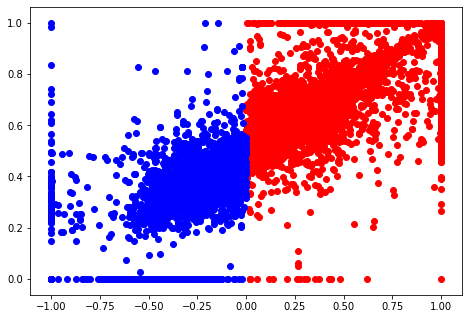

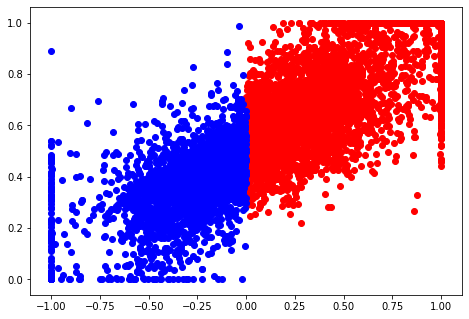

In [365]:
#so far the best has critic with double the size of generator, max_epochs=1000, batch size 256 
# now trying lowering critic gp factor 

def apply_models_a(): 
    s = data_wrapper2.apply_generator(generator2a,dfa)
    return s 

def apply_models_b(): 
    s = data_wrapper2.apply_generator(generator2b,dfb)
    return s 

import matplotlib.pyplot as plt
df_fa = apply_models_a()
df_fb = apply_models_b()
#print(rdd_estimate(df_fake)) 

fig=plt.figure() 
ax=fig.add_axes([0,0,1,1])
ax.scatter(dfa['x'],dfa['y'], color='r')
ax.scatter(dfb['x'],dfb['y'], color='b')

fig2=plt.figure() 
ax=fig2.add_axes([0,0,1,1])
ax.scatter(df_fa['x'],df_fa['y'], color='r')
ax.scatter(df_fb['x'],df_fb['y'], color='b')


In [366]:
df_fake = pd.concat([df_fb,df_fa],axis=0,ignore_index=True)
rdd_estimate(df_fake)

Estimation Equation:	 y ~ TREATED + x


0.061877208462922585

In [363]:
print(df_fb.mean())
print(dfb.mean())

print(df_fb.std())
print(dfb.std())

print(df_fa.mean())
print(dfa.mean())

#print(df_fa.std())
#print(dfa.std())

x   -0.291087
y    0.376963
dtype: float64
x   -0.291087
y    0.346522
dtype: float64
x    0.228961
y    0.138393
dtype: float64
x    0.228961
y    0.149699
dtype: float64
x    0.427845
y    0.685163
dtype: float64
x    0.427845
y    0.697881
dtype: float64


In [102]:
def apply_models_to_data():
    s = df.sample(int(1e4),replace=True)
    s = data_wrapper1.apply_generator(generator1,s) 
    dfa = s[s['x']>0].copy()
    dfb = s[s['x']<=0].copy() 
    #first generate x 
    dfa = data_wrapper2.apply_generator(generator2a,dfa)
    dfb = data_wrapper2.apply_generator(generator2b,dfb)
    return pd.concat([dfa,dfb],axis=0,ignore_index=True)

Estimation Equation:	 y ~ TREATED + x
0.06367347466443696


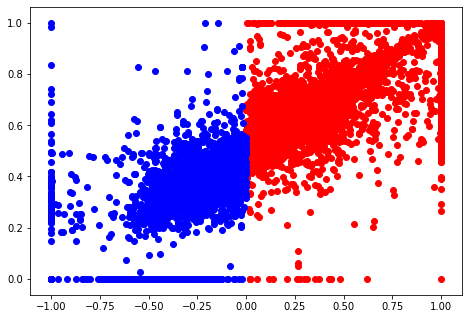

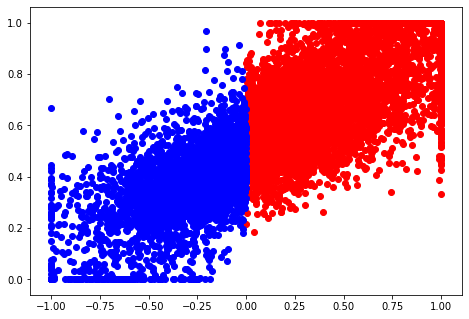

In [393]:
import matplotlib.pyplot as plt
df_fake = apply_models_to_data()
print(rdd_estimate(df_fake)) 

fig=plt.figure() 
ax=fig.add_axes([0,0,1,1])
ax.scatter(dfa['x'],dfa['y'], color='r')
ax.scatter(dfb['x'],dfb['y'], color='b')

fig2=plt.figure() 
ax=fig2.add_axes([0,0,1,1])
ax.scatter(df_fake.loc[df_fake['x']>0,'x'],df_fake.loc[df_fake['x']>0,'y'], color='r')
ax.scatter(df_fake.loc[df_fake['x']<=0,'x'],df_fake.loc[df_fake['x']<=0,'y'], color='b')

In [82]:
dfa.head() # the mean of the above 0 ones seems too high pre-training? 

,x,y
0,0.104869,0.780962
1,0.139252,0.661058
3,0.086822,0.784580
4,0.399358,0.780286
5,0.168077,0.824352


In [394]:
print(dfa['y'].mean())
print(dfb['y'].mean())

print(df_fake.loc[df_fake['x']>0,'y'].mean())
print(df_fake.loc[df_fake['x']<=0,'y'].mean())

0.6978809707176532
0.3465220178467153
0.69858265
0.3726746


In [11]:
def rdd_estimate(data):
    bandwidth_opt = rdd.optimal_bandwidth(data['y'], data['x'], cut=0) 
    data_rdd = rdd.truncated_data(data, 'x', bandwidth_opt, cut=0) 
    model = rdd.rdd(data_rdd, 'x', 'y', cut=0)
    return model.fit().params[1]

Finally, we can examine our generated data with the `compare_dfs` function.


Estimation Equation:	 y ~ TREATED + x


-0.06800322506498757

In [395]:
def evaluate_results():
  # Let's print the att!
  print("--------------------RDD--------------------")
  print("real:",rdd_estimate(df)) 
  print("fake:",rdd_estimate(df_fake))

  # Now, we'll compare our fake data to the real data
  table_groupby = ["t"]
  scatterplot = dict(x= ["x"],
                     y= ["y"],
                     samples = 5000, smooth = 0)
  histogram = dict(variables=['x','y','x','y'],
                   nrow=2, ncol=2)
  wgan.compare_dfs(df, df_fake, figsize=5, histogram=histogram, scatterplot=scatterplot)


--------------------RDD--------------------
Estimation Equation:	 y ~ TREATED + x
real: 0.08522574425161496
Estimation Equation:	 y ~ TREATED + x
fake: 0.06367347466443696
-------------comparison of means-------------
source  fake  real
x       0.14  0.13
y       0.56  0.55
-------------comparison of stds-------------
source  fake  real
x       0.45  0.46
y       0.23  0.24


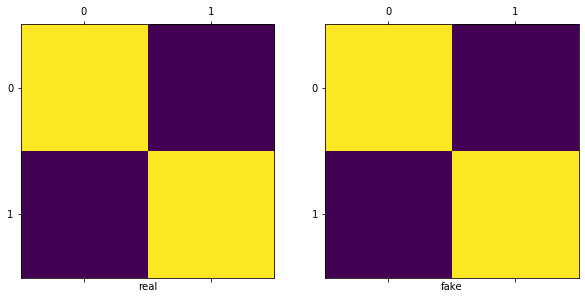

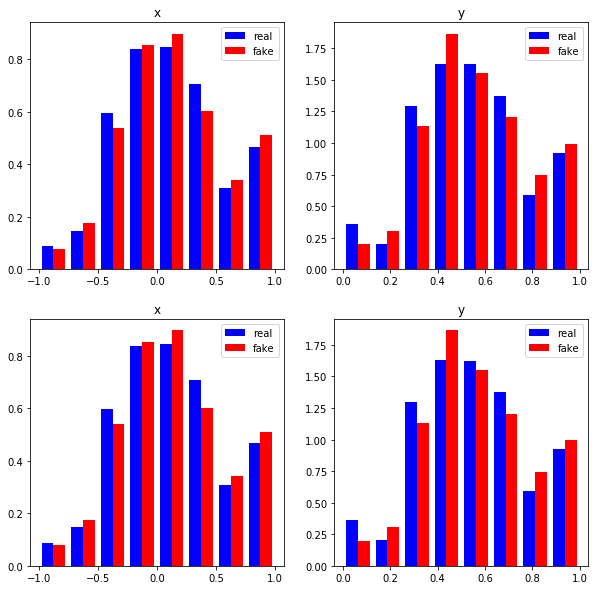

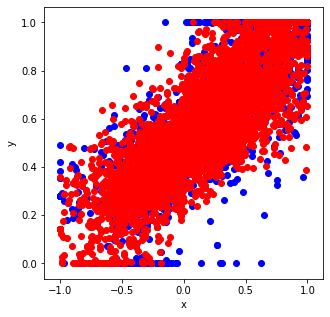

In [396]:
evaluate_results()

Looks good enough? Then save the models, generate a large dataframe and export it.

In [397]:
# save trained model parameters
def save_trained_parameters(type):
  #%mkdir trained_models
  for model, name in zip([generator1,critic1,generator2a,critic2a,generator2b,critic2b], ["G1","C1","G2a","C2a","G2b","C2b"]):
      torch.save(model.state_dict(), "trained_models/" + name + "_{}.pth".format(type))

In [398]:
save_trained_parameters("lee")

In [399]:
# generate and save data of a certain sample size
def save_generated_data(type,n_samples):
    s = df.sample(int(n_samples),replace=True)
    s = data_wrapper1.apply_generator(generator1,s) 
    print(s.head())
    dfa = s[s['x']>0].copy()
    dfb = s[s['x']<0].copy()
    print(dfb.shape)
    #first generate x 
    dfa = data_wrapper2.apply_generator(generator2a,dfa)
    dfb = data_wrapper2.apply_generator(generator2b,dfb)
    df_fake = pd.concat([dfa,dfb],axis=0,ignore_index=True)
    print(df_fake.head())
    print(rdd_estimate(df_fake))
    df_fake.to_feather("data/generated/{}_generated.feather".format(type))

In [400]:
save_generated_data("lee_cond",int(1e6))

  source         x         y
0   real -0.048731  0.366407
1   real  0.795589  0.675166
2   real -0.544827  0.489265
3   real -0.053745  0.780181
4   real -0.104060  0.565385
(414841, 3)
  source         x         y
0   real  0.795589  0.735450
1   real  0.343480  0.726714
2   real  0.765459  0.773796
3   real  0.161219  0.531113
4   real  0.544516  0.730232
Estimation Equation:	 y ~ TREATED + x
0.07173987105356007


### Generating Figures

In [401]:
gen_data1 = df_fake[df_fake["x"]>0].copy()
real_data1 = df[df["x"]>0].copy() 

gen_data2 = df_fake[df_fake["x"]<=0].copy()
real_data2 = df[df["x"]<=0].copy() 

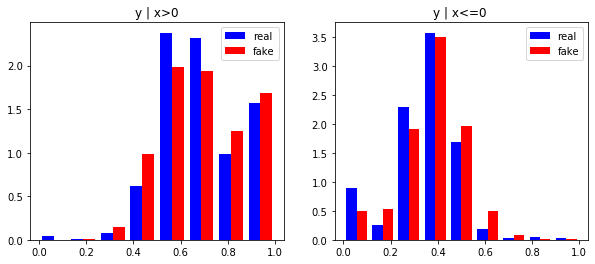

In [403]:
fig1, axarr = plt.subplots(1,2,figsize=(10, 4))
axarr[0].hist([real_data1["y"],gen_data1["y"]], bins=8, density=1,
                histtype='bar', label=["real", "fake"], color=["blue", "red"])
axarr[1].hist([real_data2["y"],gen_data2["y"]],bins=9,density=1,histtype='bar',
                  label=["real","fake"], color=["blue","red"])
axarr[0].legend(prop={"size": 10})
axarr[0].set_title("y | x>0")

axarr[1].legend(prop={"size": 10})
axarr[1].set_title("y | x<=0 ")
fig1.savefig("y_splithist.pdf")

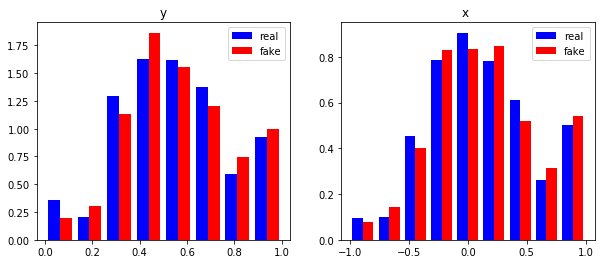

In [404]:
fig2, axarr = plt.subplots(1,2,figsize=(10, 4))
axarr[0].hist([df["y"],df_fake["y"]], bins=8, density=1,
                histtype='bar', label=["real", "fake"], color=["blue", "red"])
axarr[1].hist([df["x"],df_fake["x"]],bins=9,density=1,histtype='bar',
                  label=["real","fake"], color=["blue","red"])
axarr[0].legend(prop={"size": 10})
axarr[0].set_title("y")

axarr[1].legend(prop={"size": 10})
axarr[1].set_title("x ")
fig2.savefig("uncond_hist.pdf")